# Анализ и прогнозирование неоднородных временных рядов, БИ

## НИУ ВШЭ, 2022-23 учебный год

### Домашнее задание №4. Математическая статистика в анализе данных

Задание выполнил(а): Хорошилов Артём

### Общая информация

__Дата выдачи:__ 22.11.2022

__Дедлайн:__ 04:00 07.12.2022

### Оценивание и штрафы

Каждое задание оценивается в 4 балла.

Оценка за ДЗ вычисляется по следующей формуле:

$$
s_{\text{stat}} \times 1/2 ,
$$

где $s_{\text{stat}}$  — количество баллов, которое вы набрали в сумме по всем заданиям.

За сдачу домашнего задания позже срока на итоговую оценку за задание накладывается штраф в размере 1 **вторичный** балл в день, но  задержка не может быть больше недели.

__Внимание!__ Домашнее задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов.

### Формат сдачи

Загрузка файлов с решениями происходит в системе [Anytask](https://anytask.org/). Необходимо загружать файл с расширением .ipynb (питоновский ноутбук)

Инвайт для подключения к странице курса в системе - указан для каждой группы в нашем телеграмм-канале

### О задании

В данном домашнем задании вы попрактикуетесь в решении реальных бизнес-задач, связанных с анализом данных и применением методов математической статистики в таких задачах. В данном домашнем задании вам, возможно, понадобится больше чем обычно гуглить и читать различные статьи, получая информацию, при чем не только практического, но и теоретического характера. Это ***нормально*** и как раз поможет разобраться вам в материале, через изучение тех или иных вещей самостоятельно в понятном и комфортном для вас темпе.

Обратите внимание, что фактически во всех заданиях вам потребуется написать какой-то текст в виде вывода/результата/итога/какого-то резюме. Пожалуйста, не ленитесь, и пишите выводы ***подробно***, поскольку большая часть баллов будет выставляться именно за выводы, так как в анализе данных именно они имеют ключевое, итоговое значение и результат. Текст выводов/комментариев пишите в отдельных ячейках, используя средства текстового редактора Jupyter Notebook/Google Colab, при необходимости используйте средства *выделения*. Написанные выводы подтверждайте выполненным кодом программы.

При выполненнии заданий в данном домашнем задании нет никаких ограничений на используемые библиотеки и применяемые вами методы, функционал.

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import copy
%matplotlib inline

### Задание 1


Проанализировать набор данных и ответить на следующие вопросы:

1) Какой % наблюдений выходит за 5 и 95 перцентиль?

2) Какому закону распределения отвечают данные? На основе чего вы так решили?

[Ссылка на данные](https://drive.google.com/file/d/1fc8BGSjDiwbZW6rcr3mMSwAjU2T_BpGW/view?usp=sharing)

Описание данных:

* metrics -- значение определенной метрики в сервисе для пользователя (например, количество кликов). 


*Вместе с ответом на задание приложить код*

In [6]:
test1= pd.read_csv('/Users/artemhorosilov/Downloads/test_1_1.csv', delimiter=';')
test1=test1.drop(columns=['Unnamed: 0'])
print(test1.shape)
pd.concat([test1.head(), test1.tail()])

(306839, 1)


,metrics
0,1
1,1
2,4
3,1
4,1
306834,8
306835,11
306836,1
306837,81
306838,1


In [7]:
val1=test1.metrics.quantile(0.05)
val2=test1.metrics.quantile(0.95)
print(val1, val2)

1.0 52.0


In [8]:
Vt1=test1[test1["metrics"]>val1]
Vt1.shape
print((Vt1.shape[0]*100)/test1.shape[0])

56.967334660848195


In [9]:
Vt2=test1[test1["metrics"]>val2]
Vt2.shape
print((Vt2.shape[0]*100)/test1.shape[0])

4.987306046493438


#### Вывод1:
За пятый процентиль выходит 57% данных, за 95 перцентиль выходит 5% данных

##### Второй пункт

Установим и импортируем библиотеку, которая сравнивает 80 распределений с нашими данными.

In [ ]:
!pip install fitter

Fitting 109 distributions:  94%|█████████████▏| 103/109 [06:04<00:28,  4.80s/it]/Users/artemhorosilov/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_quadpack_py.py:1151: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
Fitting 109 distributions: 100%|██████████████| 109/109 [06:25<00:00,  3.54s/it]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
pareto,0.000512,11349.277965,-6.201595e+06,inf,0.453469,0.0
expon,0.000512,11347.281405,-6.201608e+06,inf,0.453469,0.0
gumbel_r,0.001498,12966.589393,-5.872217e+06,inf,0.297254,0.0
hypsecant,0.001847,12847.084941,-5.807898e+06,inf,0.369405,0.0
laplace,0.002027,11629.279167,-5.779378e+06,inf,0.447458,0.0


/Users/artemhorosilov/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_quadpack_py.py:1151: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


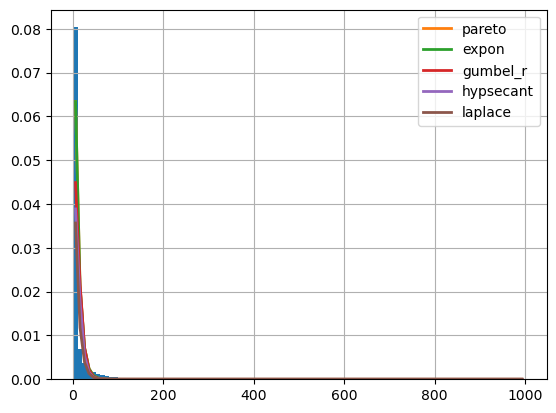

In [37]:
from fitter import Fitter
f = Fitter(test1["metrics"])
f.fit()
f.summary()

Библиотека Fitter имеет 80 распределений, она сравнивает наше(исходное) распределение с другими, и выводит 5 наиболее близких. 
Библиотека показывает на первом месте распрделение Парето, но это распределение мало чем различается с экспоненциальным, которое идет на втором месте

* Взглянем на гистограмму, по нашим данным, что бы попробовать подтвердить гипотезу о том, что это Парето

array([[<AxesSubplot:title={'center':'metrics'}>]], dtype=object)

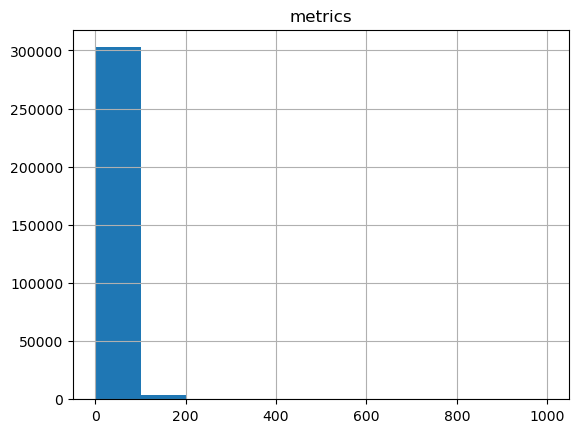

In [10]:
test1.hist()

* Масштаб и правая колонка указывает, на присутствие выбросов, избавимся от них и посмотрим снова

array([[<AxesSubplot:title={'center':'metrics'}>]], dtype=object)

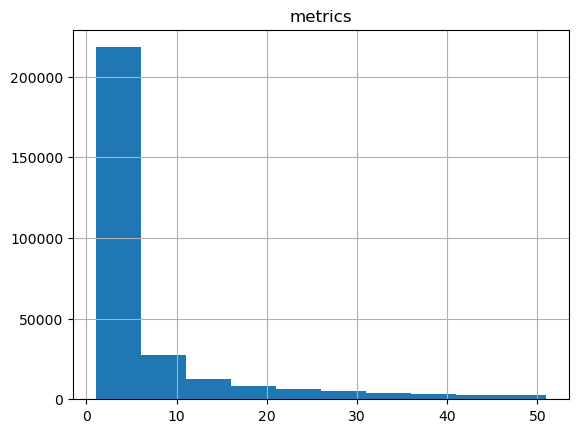

In [11]:
test11=test1[test1.metrics<test1.metrics.quantile(0.95)]
test1[test1.metrics<test1.metrics.quantile(0.95)].hist()

* Понятнее к сожалению не стало, но мы можем исключить логарифм, потому что нет значений в нуле, а значит и экспенциальное, потому что логлог граф будет давать ошибочные данные, и прямая линия на полулогарифмическом графике  графике не должна появиться, убедимся в этом. =)

<AxesSubplot:ylabel='Frequency'>

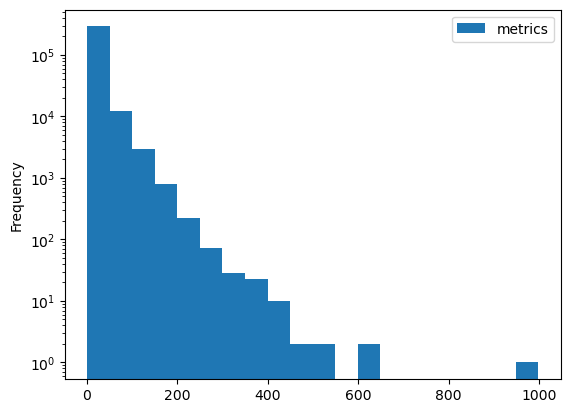

In [12]:
test1.plot.hist(bins=20,logy=True)

* Уберем выбросы

<AxesSubplot:ylabel='Frequency'>

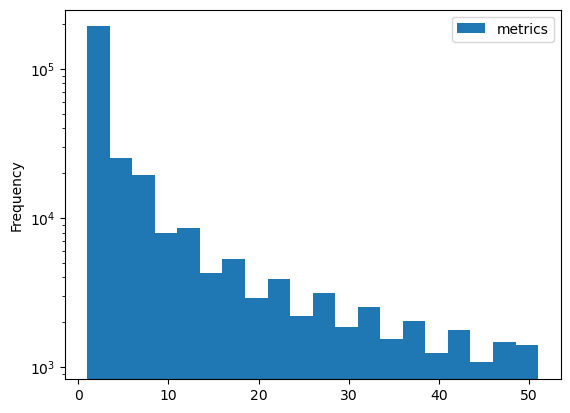

In [13]:
test11.plot.hist(bins=20,logy=True)

* Как я и предполагал, линии не получилось, попробеум проверить последнюю догадку, у идеального экспоненциаьного распределения, среднне значаение и стандартное отклонение должны быть равны, если оно не идеальное, то хотя бы приближенно.

In [14]:
print('Среднее: ', test1.mean())    
print('Медиана: ', test1.median())
print('Стандартное отклонение: ', test1.std())

Среднее:  metrics    10.146275
dtype: float64
Медиана:  metrics    2.0
dtype: float64
Стандартное отклонение:  metrics    22.627378
dtype: float64


* Как видно они сильно различаются, значит экспоненциальное распределение, я 100% отбрасываю. Попробуем   проверить признак Парето (80 на 20)

In [15]:
test_sort = test1.sort_values(by=['metrics'], ascending=False)

In [16]:
test_sort['CUMSUM_C'] = test_sort['metrics'].cumsum()

In [17]:
test_sort.shape

(306839, 2)

In [18]:
print(291091*20/100)

58218.2


In [19]:
test_sort["CUMSUM_C"].iloc[58218] 

2484652

In [20]:
test_sort.tail()

,metrics,CUMSUM_C
142105,1,3113269
142106,1,3113270
142108,1,3113271
142128,1,3113272
306838,1,3113273


In [21]:
2484652*100/3113273

79.8083560291693

#### Как я только что проанализировал, 20% выборки имеет 80% суммы, значит данные точно распределены по Парето

##### Вывод2: Распределенно по Парето

### Задание 2



Определить, можно сравнить две представленные выборки t критерием Стьюдента? 

Если нельзя сравнивать t-критерием, то что будем использовать и почему?

Ответ аргументировать и описать 

[Ссылка на данные](https://drive.google.com/file/d/1blvC6TEBWghhVMexjOdoGEjzhZZh3wSy/view?usp=sharing)

Описание данных: 

* variant -- вариация в А/Б тесте (либо группа А -- например, сайт без изменений. Либо группа Б -- сайт с изменениями)
* metrics -- значение определенной метрики в сервисе для пользователя (например, количество кликов). 

*Вместе с ответом на задание приложить код*

In [22]:
test2= pd.read_csv('/Users/artemhorosilov/Downloads/test_1_2.csv', delimiter=';')
test2=test2.drop(columns=['Unnamed: 0'])
pd.concat([test2.head(), test2.tail()])

,variant,metrics
0,A,1
1,B,1
2,A,4
3,B,37
4,B,4
184199,A,12
184200,A,8
184201,B,11
184202,B,81
184203,A,1


In [23]:
testA=test2[test2["variant"]=="A"]

In [24]:
testB=test2[test2["variant"]=="B"]

* Выборки несвязанные, так как говорится о сайтах, только один с изменениями, а другой нет, в а/б тестирование, одной и той же группе лиц не показывают разные версии, кому-то показывают одну, кому-то другую. Проверим данные  на нормальность с помошью Q-Q plot и гомогенность дисперсий.

In [25]:
#гомогенность дисперсий
from scipy.stats import levene
levene(testA["metrics"], testB["metrics"])

LeveneResult(statistic=4.313416821004634, pvalue=0.03781432358426188)

* p-value в критерии Левена = 0.037, это значение меньше уровня значимости, установленного нами в 5%, значит отвергаем нулевую гипотезу о том, что данные выборки удовлетворяют свойству гомогенности дисперсий.

In [26]:
from scipy.stats import ttest_ind, ttest_rel
from scipy.stats import t, norm
from statsmodels.api import qqplot

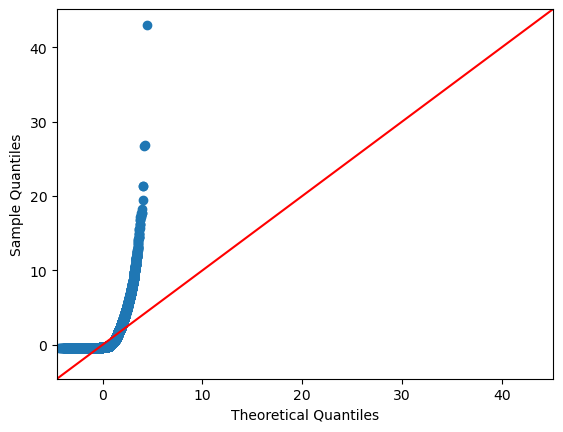

In [27]:
fig0 = qqplot(np.array(test2["metrics"]), norm, line='45', fit=True)

* Распределение не является нормальным, а значит нельзя применить t-test

* Z-test тоже нельзя применить хоть выборка и большая но мы не знаем исходное стандартное отклонение

* Будем использовать u-test, так как распределение отличается от нормального, но в сравнении с t-test повышается шанс ошибки первого рода. В случае данного задания мы вводим фичу, благодаря которой клики на сайте повышаются, а значит намного срашнее допустить ошибку второго рода, поэтому u-test идеально подойдет. Значит нулевая гипотеза такая: "Cлучайно выбранное значение из одной выборки может быть равновероятно больше или меньше случайного значения из другой выборки(A==B)." А альтернативная гипотеза:  "Значение из выборки B больше случайного значения из выборки A(B>A)" Информация про u-test была взята: [wiki](https://en.wikipedia.org/wiki/Mann–Whitney_U_test#Comparison_to_Student's_t-test).

In [28]:
from scipy import stats as st

In [29]:
st.mannwhitneyu (testA["metrics"], testB["metrics"])

MannwhitneyuResult(statistic=4195358346.0, pvalue=2.7311182624546524e-05)

#### Вывод:


Поскольку p-value меньше определенной мной статистической значимости в 5%, то мы отклоняем нулевую гипотезу.

### Задание 3



Дано две выборки по А/Б тесту.

Две выборки несбалансированные - кол-во пользователей в каждой группе разные.

Метрика, которую меряем в эксперименте (и которую используем для определения группы, которая лучше себя показала) - кол-во просмотренных страниц на пользователя 

Как вы будете принимать решение, какая группа лучше А или Б, и какие статистические методы (критерии) вы будете использовать, какие преобразования к данным применять? P.S. Если идеи не приходят в голову, возможно, вам может помочь почитать дополнительно про А/Б тесты и работу с несбалансированными выборками

[Ссылка на данные](https://drive.google.com/file/d/1_g7Dw7-8QzTS47D6GNKMb0FzqMAWBDba/view?usp=sharing)

Описание данных: 

* variant -- вариация в А/Б тесте (либо группа А -- например, сайт без изменений. Либо группа Б -- сайт с изменениями)
* metrics -- значение определенной метрики в сервисе для пользователя (например, количество кликов). 


*Вместе с ответом на задание приложить код*

* Считаем данные

In [30]:
test3= pd.read_csv('/Users/artemhorosilov/Downloads/hw2_test_1_3.csv', delimiter=';')
test3=test3.drop(columns=['Unnamed: 0'])
test3.shape

(108099, 2)

* Разделим датасет, на два других по А и D

In [31]:
test3A=test3[test3["variant"]=="A"]
test3A.shape #86%

(92686, 2)

In [32]:
test3D=test3[test3["variant"]=="D"]
test3D.shape #14%

(15413, 2)

* Как видно контрольная выборка имеет 86% всех данных, а тестовая 14%.
Посмотрим на конверсию в этих группах, чтобы примерно понимать есть ли разница

In [33]:
print('Конверсия в контрольной: ', test3A['metrics'].mean()/test3.shape[0]*100, 'Конверсия в тестовой: ', test3D['metrics'].mean()/test3.shape[0]*100)

Конверсия в контрольной:  0.009342881952555383 Конверсия в тестовой:  0.009197482212861836


* Разницы особо не видно, поэтому выдвинем нулевую гипотезу о том, что "Отсутсвует изменения в количестве кликов на сайте после изменений"

* Так как выборки А и D несбалансированные, то преобразуем данные в диапозоне [0, 1] чтобы выборки можно было сравнить. Преобразование сделаю с помощью MinMax способа, источник [MinMax](https://habr.com/ru/post/527334/)

In [34]:
test3A=(test3A['metrics']-test3A['metrics'].min())/(test3A['metrics'].max()-test3A['metrics'].min ())
test3D=(test3D['metrics']-test3D['metrics'].min())/(test3D['metrics'].max()-test3D['metrics'].min ())

* Попробую проверить выборку на гомогенность и нормальность, так как выборки несвязанные чтобы понять могу ли я сравнить эти выборки с критерием стьюдента

In [35]:
#гомогенность дисперсий
levene(test3A, test3D)

LeveneResult(statistic=2526.047253417491, pvalue=0.0)

* p-value в критерии Левена = 0.4, это значение ,больше уровня значимости, установленного нами в 5%, значит не можем отвергнуть нулевую гипотезу о том, что данные выборки удовлетворяют свойству гомогенности дисперсий.

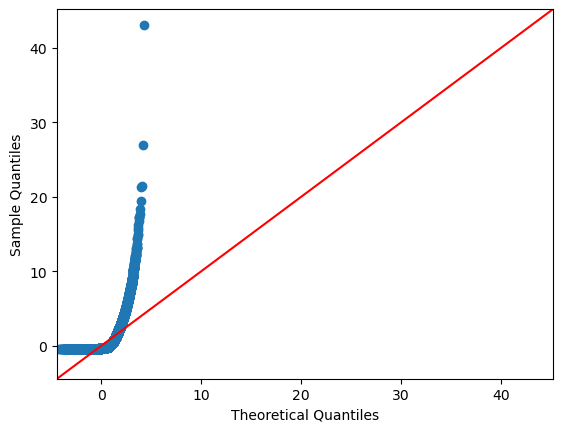

In [36]:
fig0 = qqplot(np.array(test3["metrics"]), norm, line='45', fit=True)

###### Линиия вообще не ровная, а значит данные распредленны по другому закону.

###### Для сравнения выборок и отклонения гипотез буду использовать статистику u-test,
Она подойдет идеально, так как исходное стандартное отклонение неизвестно, две выборки распредлены независимо друг от друга, распределение отличается от нормального, а данных очень много.

In [37]:
st.mannwhitneyu (test3A, test3D)

MannwhitneyuResult(statistic=631387902.5, pvalue=1.235100169908559e-128)

#### Вывод: p-value намного меньше установленной сатистической значимости в 5%, значит нулевая гипотеза об отсутсвии разнизы между выборками будет отклонена

### Задание 4



Есть данные с большой дисперсии у метрики (диспресию метрики можно посчитать для каждой группы). Для их дальнейшего анализа дисперсию необходимо сократить. Как определить, что дисперсия действительно большая? Если она большая, как вы будете ее чистить? Ответ аргументировать и описать.  P.S. Если идеи не приходят в голову, возможно, вам может помочь почитать дополнительно про А/Б тесты и снижение дисперсии в них

Описание данных: 

* metrics -- значение определенной метрики в сервисе для пользователя (например, количество кликов). 

[Ссылка на данные](https://drive.google.com/file/d/1fc8BGSjDiwbZW6rcr3mMSwAjU2T_BpGW/view?usp=sharing)

*Вместе с ответом на задание приложить код*

In [38]:
test4= pd.read_csv('/Users/artemhorosilov/Downloads/test_1_1.csv', delimiter=';')
print(test4.shape)
pd.concat([test4.head(), test4.tail()])

(306839, 2)


,Unnamed: 0,metrics
0,1,1
1,2,1
2,3,4
3,4,1
4,5,1
306834,306835,8
306835,306836,11
306836,306837,1
306837,306838,81
306838,306839,1


* Посмотрим на дисперсию

In [39]:
print("Дисперсия: ", test4["metrics"].var())

Дисперсия:  511.99823268544515


* Теперь нужно понять является ли дисперсия действительно большой, для этого посмтори на квантили 5, 50, 95, и на максимальное минимальное значение

In [40]:
print("Пятый квантиль: " , test4.metrics.quantile(0.05))
print("50 квантиль или медиана: ", test4.metrics.quantile(0.5))
print("95 квантиль: " ,test4.metrics.quantile(0.95))
print("Минимум: ", test4.metrics.min())
print("Максимум: " ,test4.metrics.max())

Пятый квантиль:  1.0
50 квантиль или медиана:  2.0
95 квантиль:  52.0
Минимум:  1
Максимум:  998


* Как видно отклонение по сравнению с минимальным, медианой и 95 квантилем действительно велико

* Посмотрим на гистограмму что понять есть ли выбросы

<AxesSubplot:>

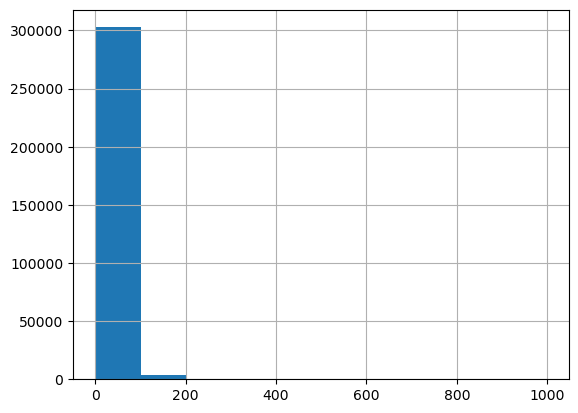

In [41]:
test4["metrics"].hist()

* Выбросы есть, избавимся от них и посмотрим на дисперсию

In [42]:
test4_final=test4[test4.metrics<test4.metrics.quantile(0.95)]

<AxesSubplot:>

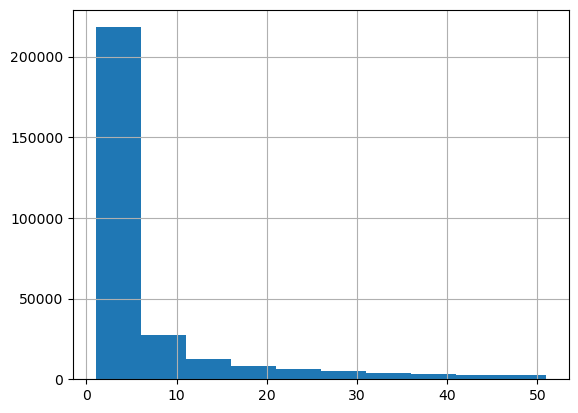

In [43]:
test4_final["metrics"].hist()

* Выглядит намного лучше

In [44]:
print("Дисперсия после отброса выбросов: ", test4_final["metrics"].var())

Дисперсия после отброса выбросов:  88.33599671601749


* Получилось что мы сократили дисперсию на 83%

* Но я всего лишь сократил данные, что не очень хорошо и если бы речь в задании шла о деньгах, получился бы кошмар для бухгалтерии

* Посмотрим на количество наблюдений в данных

In [45]:
test4.shape[0]

306839

* Данных достаточно много, а значит можно воспользоваться ЦПТ, которая гласит, что чем больше выборка тем лучше она апроксимируется нормальным распределением, приведем к стандартному нормальному распределению N ~ (0, 1)

In [46]:
test4["metrics_norm"]=(test4["metrics"]-test4["metrics"].mean())/test4["metrics"].std()

* По идее теперь дисперсия должна быть достаточна близка к единице, либо единицей, проверим это

In [47]:
print("Дисперсия после нормализации: ", test4["metrics_norm"].var())

Дисперсия после нормализации:  0.9999999999997893


* Моя гипотеза подтвердилась 

#### Вывод:
Мне кажется понижение дисперсии за счет удаления выбросов не всегда подходит под условие задание, а так как условие я не знаю из-за анонимности данных, я попробовал минимизировать дисперсию с помощью апроксимации нормальным распределением.

### Задание 5



Есть эксперимент с поисковыми подсказками. Вы хотите узнать, как изменился CTR в каждой группе эксперимента.

**Данные**

- id - уникальный идентификатор пользователя
- action -
- view - кол-во просмотров на одну сессию
- variant - вариант a/b теста, где 0 - это версия "A", 1 -  версия "B".

**Задача**

- сформировать метрику для оценки эксперимента
- подобрать критерий под особенности данных
- сделать вывод о значимости эффекта

**Данные** 

[Ссылка на данные](https://www.dropbox.com/s/fdki267uilkfq7l/task5.csv)

In [48]:
test5= pd.read_csv('/Users/artemhorosilov/Downloads/task5.csv')
pd.concat([test5.head(), test5.tail()])

,id,variant,view,action
0,88258,A,10,2
1,109938,A,3,1
2,117644,A,7,5
3,374080,A,9,9
4,662082,A,1,1
8186,7706713,B,1,1
8187,7875223,B,1,1
8188,4617329,B,9,4
8189,5394863,B,5,1
8190,7558165,B,1,1


* Разделим датасет на контрольную и тестовую группу

In [49]:
test5A=test5[test5["variant"]=="A"]
test5B=test5[test5["variant"]=="B"]

* Предположим что это данные взяты с Яндекс маркета и если view обозначает количесвто просмотренных товаров, то action значит количесвто купленных. В качестве метрики возьмем "Конверсию".

In [50]:
test5["metrics"]=test5["action"]/test5["view"] #конверсия

* Посчитаю конверсию для каждой выборки по отдельности, так как я делю на количество наблюдений, а тестовая выборка должна помаксимуму отражать контрольную. 

In [51]:
test5A["metrics"]=test5A["action"]/test5A["view"]
test5B["metrics"]=test5B["action"]/test5B["view"]

/var/folders/pj/d6d294yj48d91tmrgk29qv540000gn/T/ipykernel_37980/1476311300.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test5A["metrics"]=test5A["action"]/test5A["view"]
/var/folders/pj/d6d294yj48d91tmrgk29qv540000gn/T/ipykernel_37980/1476311300.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test5B["metrics"]=test5B["action"]/test5B["view"]


* Я хочу попробовать использовать t-test, для этого проверю гомогенность дисперсии и нормальность распределения

In [52]:
from scipy.stats import levene
levene(test5A["metrics"], test5B["metrics"])

LeveneResult(statistic=0.5797216434192661, pvalue=0.44644337372072784)

* В критерии Левена, нулевой гипотезой является гипотеза о том, что данные выборки удовлетворяют свойству гомогенности дисперсий. P-value этой гипотезы получилось 0.446. Это значение больше уровня значимости, установленного в 5%, значит у нас нет оснований отвергнуть нулевую гипотезу и считать, что выборка имеет негомогенные дисперсии.

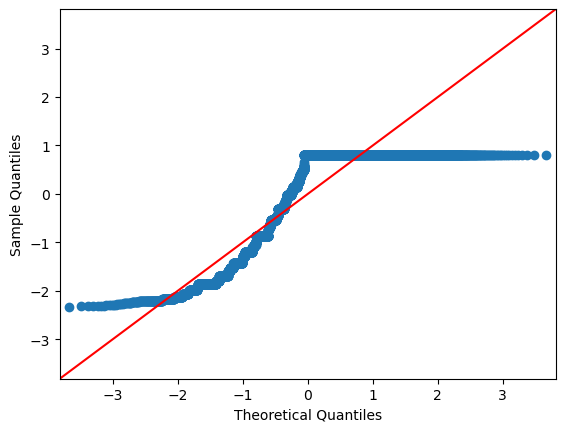

In [53]:
fig0 = qqplot(np.array(test5["metrics"]), norm, line='45', fit=True)

* Данные распределены не очень норммально, но есть просвет в центре, попробую избавиться от выбросов и посмотреть опять

In [54]:
test5N=test5[ (test5.metrics<test5.metrics.quantile(0.95)) & (test5.metrics>test5.metrics.quantile(0.05))]

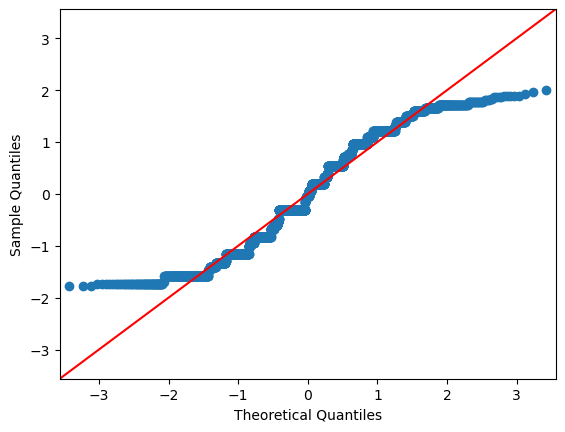

In [55]:
fig0 = qqplot(np.array(test5N["metrics"]), norm, line='45', fit=True)

* Ситуация не изменилась, зато я убедился, что данные распредлены по закону отличному от нормального

* Попробую приблизить распредление к нормальному, по-другому, например, с помощью логарифмического преобразования
Взгляну на гистограму

<AxesSubplot:>

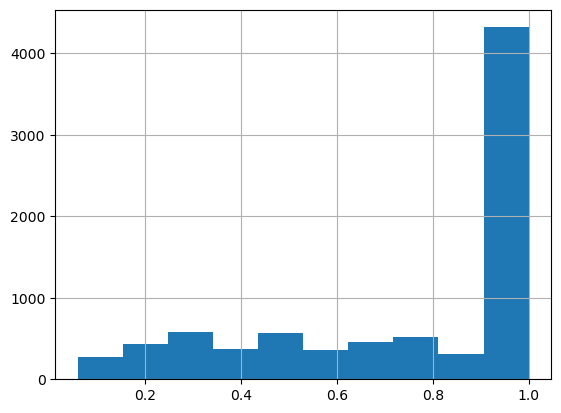

In [56]:
test5.metrics.hist()

* Возьмем натуральный логарифм от каждого значения

<AxesSubplot:>

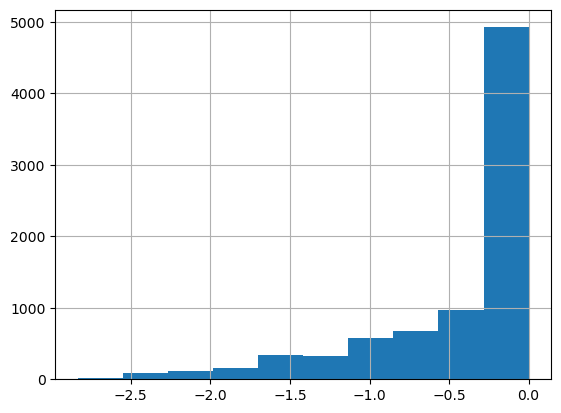

In [57]:
test5['nat'] = np.log(test5['metrics'])
test5.nat.hist()

* Логарифм не привел ни к чему, поэтому t-test использовать не можем

* Выборки независимы друг от друга, поэтому я буду использовать u-test.

In [58]:
st.mannwhitneyu (test5A["metrics"], test5B["metrics"])

MannwhitneyuResult(statistic=8325404.5, pvalue=0.3570928785921109)

#### Вывод: pvalue равно 0.357, что соотвествует 35,7%. Это значение больше уровня значимости, установленного в 5%, значит нет оснований отвергать нулевую гипотезу об отсуствии различий.

#### Вообщем вводить фичу смело можно, так как тестовая группа по сравнению с контрольной показала себя очень хорошо, конечно же если мы говорим о максимизации прибыли.